HW 2 Code

## Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def SIR(S0,I0,R0, beta, gamma, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    S = np.zeros(len(T))
    I = np.zeros(len(T))
    R = np.zeros(len(T))
    N = S0+I0+R0
    
    for idx,t in enumerate(T):
        if idx==0:
            S[idx] = S0
            I[idx] = I0
            R[idx] = R0
        else:
            dS_dt = -beta * S[idx-1] * I[idx-1] / N
            dI_dt = beta * S[idx-1] * I[idx-1] / N - gamma * I[idx-1]
            dR_dt = gamma * I[idx-1]
            
            S[idx] = S[idx-1] + dS_dt * stepsize
            I[idx] = I[idx-1] + dI_dt * stepsize
            R[idx] = R[idx-1] + dR_dt * stepsize
    
    return S, I, R, T

def SIS_norm(s0,i0, beta, gamma, t_max, stepsize):
    T = np.arange(0,t_max+stepsize,stepsize)
    s = np.zeros(len(T))
    i = np.zeros(len(T))
    
    for idx,t in enumerate(T):
        if idx==0:
            s[idx] = s0
            i[idx] = i0
        else:
            dS_dt = -beta * s[idx-1] * i[idx-1] + gamma * i[idx-1]
            dI_dt = beta * s[idx-1] * i[idx-1] - gamma * i[idx-1]
            
            s[idx] = s[idx-1] + dS_dt * stepsize
            i[idx] = i[idx-1] + dI_dt * stepsize
    
    return s, i, T

def analytical_SIS(t_max, time_step, beta, gamma, i0):
    t = np.arange(0, t_max + time_step, time_step)
    r = beta - gamma
    if np.isclose(r, 0.0):  # handle beta == gamma edge case
        i_t = i0 / (1.0 + beta * i0 * t)
    else:
        numerator = i0 * np.exp(r * t)
        denominator = 1 + (beta * i0 / r) * (np.exp(r * t) - 1)
        i_t = numerator / denominator

    return i_t, t



## Q1.a

In [8]:
# SIR_norm(S0,I0,R0, beta, gamma, t_max, stepsize):
beta = 3
gamma = 2
t_max = 25
s0 = 0.99
i0 = 0.01

s_1,i_1,T_1 = SIS_norm(s0, i0, beta, gamma, t_max,2)
s_2,i_2,T_2 = SIS_norm(s0, i0, beta, gamma, t_max,1)
s_3,i_3,T_3 = SIS_norm(s0, i0, beta, gamma, t_max,0.5)
s_4,i_4,T_4 = SIS_norm(s0, i0, beta, gamma, t_max,0.001)


# # analytical_SIS(t_max, time_step, beta, gamma, i0):
analytical_i1, analytical_t1 = analytical_SIS(t_max, 2, beta, gamma, i0)
analytical_i2, analytical_t2 = analytical_SIS(t_max, 1, beta, gamma, i0)
analytical_i3, analytical_t3 = analytical_SIS(t_max, 0.5, beta, gamma, i0)



fig, ax = plt.subplots()
ax.plot(T_1, i_1, color='red', label='Forward I w/ t_step = 2')
ax.plot(analytical_t1, analytical_i1, color='black', linestyle='--', label='Analytical I w/ t_step = 2')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(0, 0.5)
ax.set_xlim(0, 25)
ax.set_title("Norm. SIR w/ t_step = 2")
fig.savefig("figures/sir_dt2.png", dpi=300, bbox_inches='tight')
plt.close(fig)

fig, ax = plt.subplots()
ax.plot(T_2, i_2, color='red', label='Forward I w/ t_step = 1')
ax.plot(analytical_t2, analytical_i2, color='black', linestyle='--', label='Analytical I w/ t_step = 1')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(0, 0.5)
ax.set_xlim(0, 25)
ax.set_title("Norm. SIR w/ t_step = 1")
fig.savefig("figures/sir_dt1.png", dpi=300, bbox_inches='tight')
plt.close(fig)

fig, ax = plt.subplots()
ax.plot(T_3, i_3, color='red', label='Forward I w/ t_step = 0.5')
ax.plot(analytical_t3, analytical_i3, color='black', linestyle='--', label='Analytical I w/ t_step = 0.5')
ax.set_xlabel('time')
ax.set_ylabel('people')
ax.legend()
ax.set_ylim(0, 0.5)
ax.set_xlim(0, 25)
ax.set_title("Norm. SIR w/ t_step = 0.5")
fig.savefig("figures/sir_dt0.5.png", dpi=300, bbox_inches='tight')
plt.close(fig)


## Q1.c

In [ ]:
def max_abs_error(s0, i0, beta, gamma, t_max, stepsize):
    _, i_euler, T = SIS_norm(s0, i0, beta, gamma, t_max, stepsize)
    i_analytical, _ = analytical_SIS(t_max, stepsize, beta, gamma, i0)

    E = np.max(np.abs(i_euler - i_analytical))

    return E

Q1.d

dt = 2     ->  E(dt) = 0.12634
dt = 1     ->  E(dt) = 0.08077
dt = 0.5   ->  E(dt) = 0.04284
dt = 0.25  ->  E(dt) = 0.02200
dt = 0.125  ->  E(dt) = 0.01111
dt = 0.0625  ->  E(dt) = 0.00558
dt = 0.03125  ->  E(dt) = 0.00280
[2, 1, 0.5, 0.25, 0.125, 0.0625, 0.03125]
[np.float64(0.1263393498870075), np.float64(0.08077107437456943), np.float64(0.04283504637204699), np.float64(0.02199772042578743), np.float64(0.011110659764940939), np.float64(0.005580919660415989), np.float64(0.002795846918956485)]


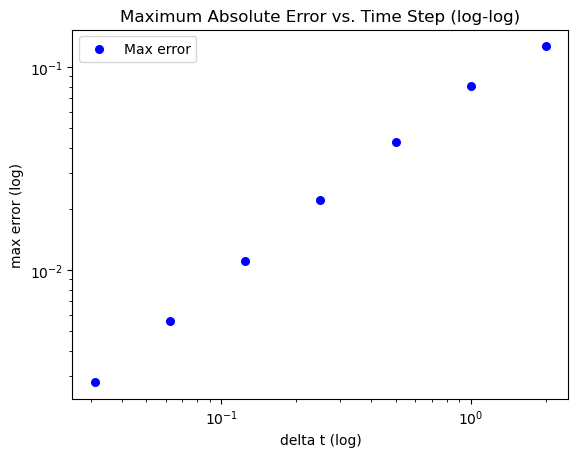

In [10]:
# Try different deltas
deltas = [2, 1, 1/2, 1/4, 1/8, 1/16, 1/32]
ets = []

i = 0
for dt in deltas:
    ets.append(max_abs_error(s0, i0, beta, gamma, t_max, dt))
    print(f"dt = {dt:<4}  ->  E(dt) = {ets[i]:.5f}")
    i+=1
print(deltas)
print(ets)

fig, ax = plt.subplots()
ax.scatter(deltas, ets, color='blue', s=30, label='Max error')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("delta t (log)")
ax.set_ylabel("max error (log)")
ax.set_title("Maximum Absolute Error vs. Time Step (log-log)")
fig.savefig("figures/max_abs_error.png", dpi=300, bbox_inches='tight')
ax.legend()